In [1]:
import sys
sys.path.append("/Users/ktakeda/workspace/kaggle/rsna-breast-cancer-detection")
import cv2
import matplotlib.pyplot as plt

from torch.utils.data import Dataset, DataLoader, Subset

from rsna.utility import load_data
from rsna.preprocess import df_preprocess, Transform
from rsna.dataset import RSNADatasetPNG
from rsna import preprocess as prep
import matplotlib.patches as patches


import numpy as np
from omegaconf import DictConfig, OmegaConf

/Users/ktakeda/workspace/kaggle/rsna-breast-cancer-detection/rsna3.10/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
df_train = load_data("train", custom_path="/Users/ktakeda/workspace/kaggle/rsna-breast-cancer-detection/data/dicom2png_512")
df_train = df_preprocess(df_train, is_train=True, sampling="down")
df_train = df_train.reset_index(drop=True)
df_train.head()

,patient_id,image_id,age,implant,path,cancer,laterality,view
0,15696,1216427802,65.0,0,/Users/ktakeda/workspace/kaggle/rsna-breast-ca...,0,1,3
1,9228,334114182,51.0,0,/Users/ktakeda/workspace/kaggle/rsna-breast-ca...,0,1,3
2,50234,1509636612,52.0,0,/Users/ktakeda/workspace/kaggle/rsna-breast-ca...,0,1,1
3,26178,1617112699,40.0,0,/Users/ktakeda/workspace/kaggle/rsna-breast-ca...,0,1,1
4,15350,1399405629,65.0,0,/Users/ktakeda/workspace/kaggle/rsna-breast-ca...,0,1,1


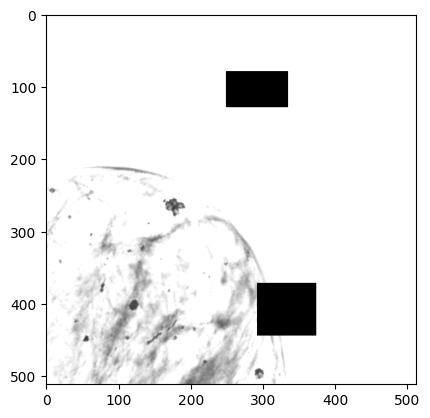

In [15]:
cfg = DictConfig({"aug": {"version":"v0.0.3", "horizontal_flip":0.5, "vertical_flip":0.5}})
transform = Transform(cfg)
train_dataset = RSNADatasetPNG(df_train[df_train["cancer"]==1].reset_index(drop=True), transform.get(is_train=True), ["laterality", "view", "age", "implant"], has_target=True, image_prep_ver="v3")

image = data["image"].squeeze(1)[0]
plt.imshow(image, cmap="gray")

(array([1.02860e+04, 0.00000e+00, 1.38000e+02, 2.39000e+02, 5.11000e+02,
        1.78700e+03, 3.09600e+03, 6.04900e+03, 1.05370e+04, 2.29501e+05]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <BarContainer object of 10 artists>)

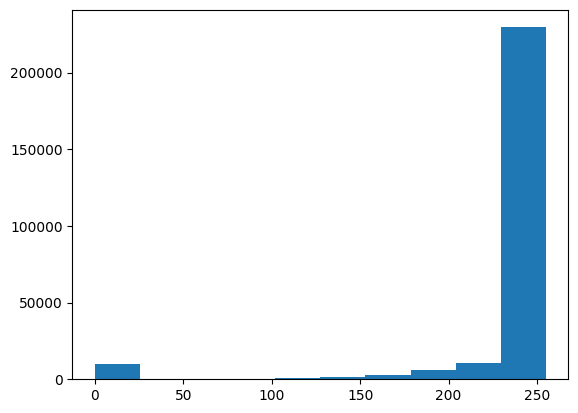

In [16]:
plt.hist(image.flatten())

torch.Size([1, 512, 512])


(array([1.48010e+04, 0.00000e+00, 1.20000e+01, 1.67000e+02, 1.78000e+02,
        3.76000e+02, 9.02000e+02, 1.35300e+03, 2.34800e+03, 2.42007e+05]),
 array([0.        , 0.1       , 0.2       , 0.30000001, 0.40000001,
        0.5       , 0.60000002, 0.69999999, 0.80000001, 0.89999998,
        1.        ]),
 <BarContainer object of 10 artists>)

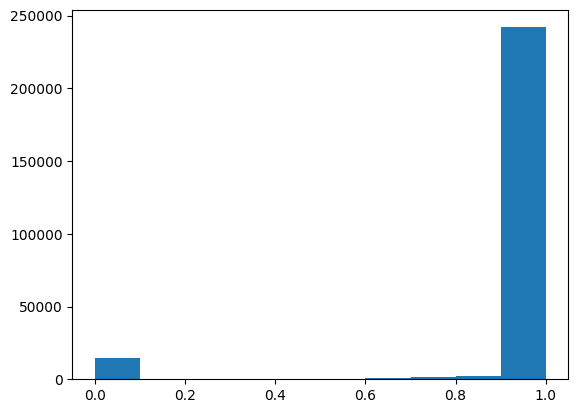

In [26]:
cfg = DictConfig({"aug": {"version":"v0.0.3", "horizontal_flip":0.5, "vertical_flip":0.5}})
transform = Transform(cfg)
train_dataset = RSNADatasetPNG(df_train[df_train["cancer"]==1].reset_index(drop=True), transform.get(is_train=True), ["laterality", "view", "age", "implant"], has_target=True, image_prep_ver="v3")

data = train_dataset[0]
print(data["image"].shape)
image = data["image"].squeeze(1)[0]
plt.hist(image.flatten())
# plt.imshow(image, cmap="gray")